# **EDA ON UBER DATA SET**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
uber=pd.read_csv('/content/UberDataset.csv')
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [107]:
uber.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [108]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


### Checking for missing values


In [109]:
uber.isnull().sum()

,0
START_DATE,0
END_DATE,1
CATEGORY,1
START,1
STOP,1
MILES,0
PURPOSE,503


In [110]:
uber.duplicated().sum()

np.int64(1)

In [111]:
uber.nunique()

,0
START_DATE,1155
END_DATE,1154
CATEGORY,2
START,177
STOP,188
MILES,257
PURPOSE,10


In [112]:
uber['PURPOSE'].value_counts()

,count
PURPOSE,
Meeting,187
Meal/Entertain,160
Errand/Supplies,128
Customer Visit,101
Temporary Site,50
Between Offices,18
Moving,4
Airport/Travel,3
Commute,1


In [113]:
uber['PURPOSE'] = uber['PURPOSE'].ffill()

In [114]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [115]:
uber['START_DATE'] = pd.to_datetime(uber['START_DATE'],errors='coerce')
uber['END_DATE'] = pd.to_datetime(uber['END_DATE'],errors='coerce')

In [116]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit


In [117]:
# seperate the date and time and month and year
uber['start_date'] = uber['START_DATE'].dt.date
uber['start_time'] = uber['START_DATE'].dt.time
uber['end_date'] = uber['END_DATE'].dt.date
uber['end_time'] = uber['END_DATE'].dt.time
uber['month'] = uber['START_DATE'].dt.month
uber['year'] = uber['START_DATE'].dt.year


In [118]:
uber.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,start_date,start_time,end_date,end_time,month,year
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21:11:00,2016-01-01,21:17:00,1.0,2016.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,2016-01-02,01:25:00,2016-01-02,01:37:00,1.0,2016.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20:25:00,2016-01-02,20:38:00,1.0,2016.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17:31:00,2016-01-05,17:45:00,1.0,2016.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14:42:00,2016-01-06,15:49:00,1.0,2016.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17:15:00,2016-01-06,17:19:00,1.0,2016.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17:30:00,2016-01-06,17:35:00,1.0,2016.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13:27:00,2016-01-07,13:33:00,1.0,2016.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,08:05:00,2016-01-10,08:25:00,1.0,2016.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12:17:00,2016-01-10,12:44:00,1.0,2016.0


In [119]:
uber.drop(['START_DATE','END_DATE'],axis=1,inplace=True)
uber = uber[['start_date','start_time','end_date','end_time','month','year','CATEGORY','START','STOP','MILES','PURPOSE']]

In [136]:
uber.month.value_counts()

,count
month,
11,798
8,43
6,42
3,42
7,41
2,40
12,39
5,26
4,25


In [121]:
uber.month.isnull().sum()

np.int64(735)

In [122]:
# uber.month.fillna(fill,inplace=True)
uber['month'] = uber['month'].fillna(uber['month'].mode()[0])
uber['month'] = uber['month'].astype(int)


In [123]:
uber.head(10)

,start_date,start_time,end_date,end_time,month,year,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01,21:11:00,2016-01-01,21:17:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02,01:25:00,2016-01-02,01:37:00,1,2016.0,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02,20:25:00,2016-01-02,20:38:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05,17:31:00,2016-01-05,17:45:00,1,2016.0,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06,14:42:00,2016-01-06,15:49:00,1,2016.0,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,2016-01-06,17:15:00,2016-01-06,17:19:00,1,2016.0,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,2016-01-06,17:30:00,2016-01-06,17:35:00,1,2016.0,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,2016-01-07,13:27:00,2016-01-07,13:33:00,1,2016.0,Business,Cary,Cary,0.8,Meeting
8,2016-01-10,08:05:00,2016-01-10,08:25:00,1,2016.0,Business,Cary,Morrisville,8.3,Meeting
9,2016-01-10,12:17:00,2016-01-10,12:44:00,1,2016.0,Business,Jamaica,New York,16.5,Customer Visit


In [124]:
uber.month.count()

np.int64(1156)

In [125]:
uber.month.value_counts()

,count
month,
11,798
8,43
6,42
3,42
7,41
2,40
12,39
5,26
4,25


In [126]:
uber['year'] = uber['year'].fillna(uber['year'].mode()[0])
uber['year'] = uber['year'].astype(int)

In [127]:
uber.dtypes

,0
start_date,object
start_time,object
end_date,object
end_time,object
month,int64
year,int64
CATEGORY,object
START,object
STOP,object
MILES,float64


In [128]:
# convert start_time and end_time to hours and minutes
uber['start_hour'] = uber['start_time'].apply(lambda x: x.hour)
uber['start_minute'] = uber['start_time'].apply(lambda x: x.minute)
uber['end_hour'] = uber['end_time'].apply(lambda x: x.hour)
uber['end_minute'] = uber['end_time'].apply(lambda x: x.minute)

In [129]:
# rearrange the columns and drop start_time and end_time columns
uber = uber[['start_date','start_hour','start_minute','end_date','end_hour','end_minute','month','year','CATEGORY','START','STOP','MILES','PURPOSE']]


In [130]:
# create a new column for duration of the trip to be in minutes
uber['duration'] = uber['end_hour']*60 + uber['end_minute'] - (uber['start_hour']*60 + uber['start_minute'])



<ipython-input-130-143024995>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber['duration'] = uber['end_hour']*60 + uber['end_minute'] - (uber['start_hour']*60 + uber['start_minute'])


In [131]:
uber.describe()

,start_hour,start_minute,end_hour,end_minute,month,year,MILES,duration
count,421.000000,421.000000,420.000000,420.000000,1156.000000,1156.0,1156.000000,420.000000
mean,14.988124,29.741093,14.857143,28.311905,9.467993,2016.0,21.115398,-8.102381
std,4.668777,17.446843,4.957920,17.673662,2.925306,0.0,359.299007,195.917306
min,0.000000,0.000000,0.000000,0.000000,1.000000,2016.0,0.500000,-1432.000000
25%,12.000000,15.000000,12.000000,13.000000,9.000000,2016.0,2.900000,9.000000
50%,15.000000,30.000000,15.000000,27.000000,11.000000,2016.0,6.000000,15.000000
75%,18.000000,46.000000,18.000000,44.000000,11.000000,2016.0,10.400000,22.000000
max,23.000000,59.000000,23.000000,59.000000,12.000000,2016.0,12204.700000,178.000000


### Visualizing the data

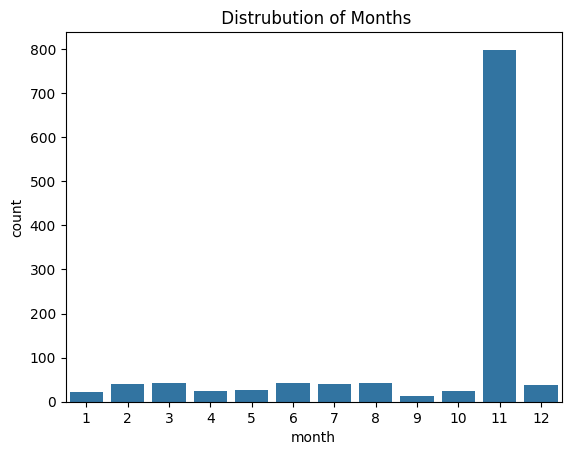

In [132]:
sns.countplot(x='month',data=uber)
plt.title(" Distrubution of Months")
plt.show()

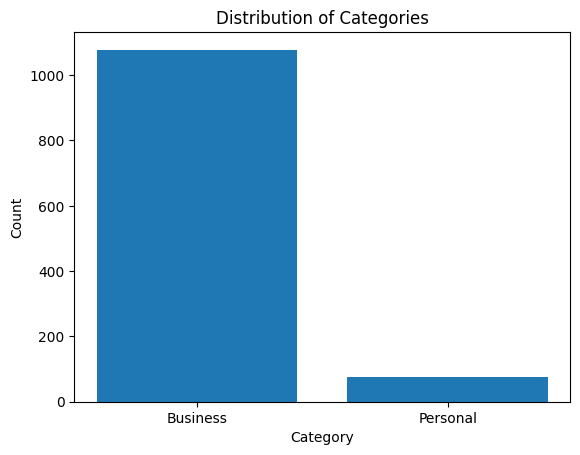

In [133]:
# Count the occurrences of each category
category_counts = uber['CATEGORY'].value_counts()

# Create a bar plot
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()

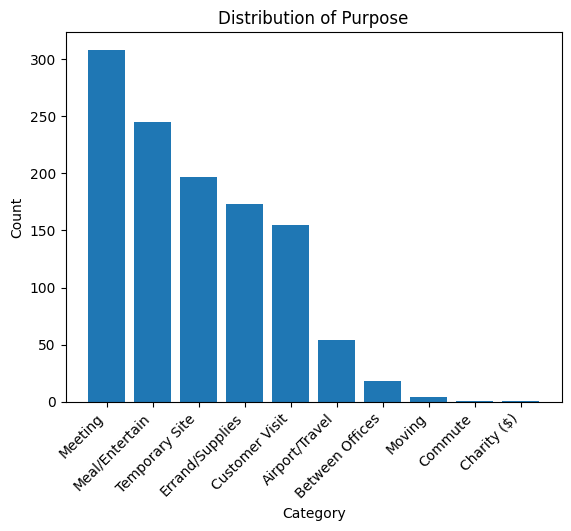

In [134]:
# Count the occurrences of each purpose
purpose_counts = uber['PURPOSE'].value_counts()

# Create a bar plot
plt.bar(purpose_counts.index, purpose_counts.values)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Purpose')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

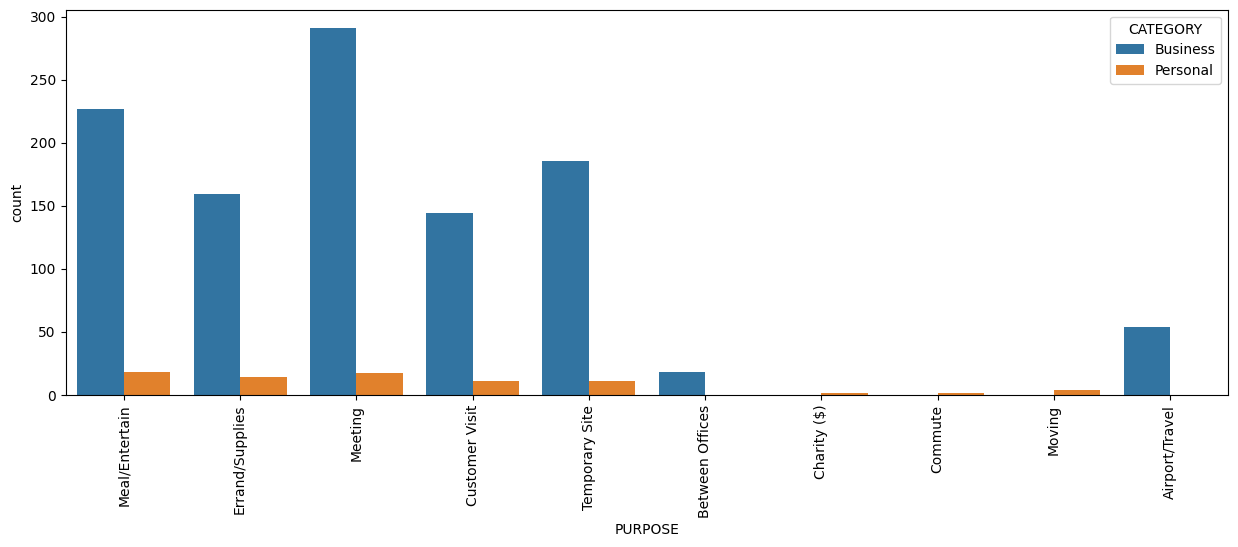

In [135]:

plt.figure(figsize=(15, 5))
sns.countplot(data=uber, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

**CONCLUSIONS FROM THE PROJECT**


*  More rides in the month of november
*  uber is mostly used for business purposes rather than personal
*  “Meeting” is the most common trip purpose in uber
*  most Uber trips were for business purposes, especially for meetings, meals/  entertainment, and temporary site visits, while personal trips were relatively few across all purposes





  **changes performed to dataset**

*   we have cleaned the data and filled the null values
*   We have converted the datatypes of the values
*   we visualized data into bar plots for representation


